In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("datasets/credit/german_credit_data.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
dataset.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Text(0.5, 1.0, 'Missing value heatmap')

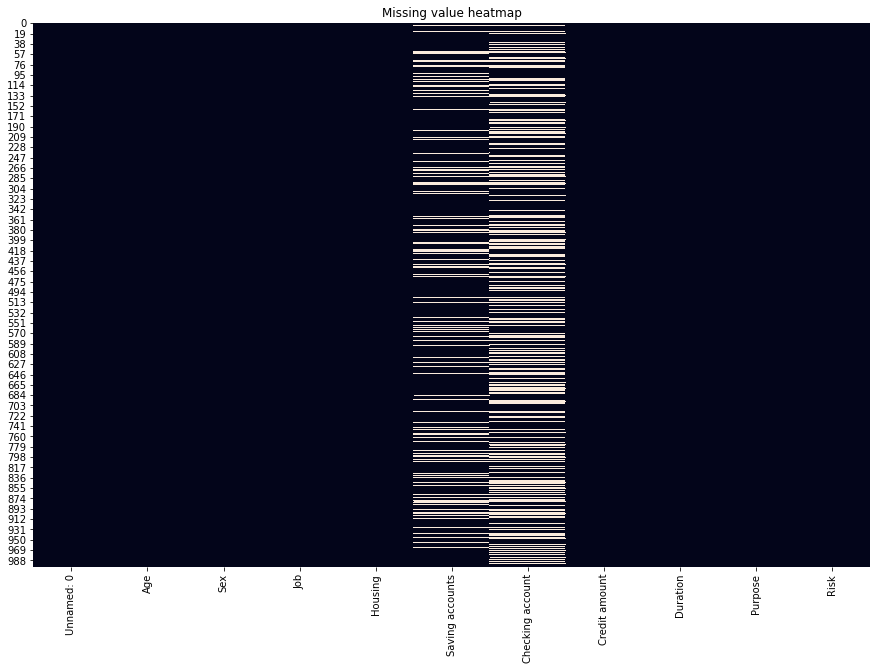

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.isnull(),cbar = False).set_title("Missing value heatmap")

In [6]:
dataset.dropna(subset=['Saving accounts','Checking account'], inplace=True)

In [7]:
dataset.shape

(522, 11)

In [8]:
dataset.nunique()

Unnamed: 0          522
Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64

In [9]:
dataset.sample(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
728,728,59,female,2,rent,little,moderate,6416,48,business,bad
610,610,22,female,2,own,moderate,little,741,12,domestic appliances,bad
588,588,47,male,1,own,little,little,1217,18,domestic appliances,bad
86,86,27,female,2,own,little,moderate,1295,18,furniture/equipment,good
334,334,23,male,2,rent,little,little,4110,24,furniture/equipment,bad


In [10]:
du = {"Sex":[],"Housing":[],"Saving accounts":[],"Checking account":[],"Purpose":[],"Risk":[]}
for i in du.keys():
    du[i] = dataset[i].unique()
du

{'Sex': array(['female', 'male'], dtype=object),
 'Housing': array(['own', 'free', 'rent'], dtype=object),
 'Saving accounts': array(['little', 'moderate', 'quite rich', 'rich'], dtype=object),
 'Checking account': array(['moderate', 'little', 'rich'], dtype=object),
 'Purpose': array(['radio/TV', 'furniture/equipment', 'car', 'business',
        'domestic appliances', 'repairs', 'vacation/others', 'education'],
       dtype=object),
 'Risk': array(['bad', 'good'], dtype=object)}

In [11]:
du_encoder, du_decoder = du.copy(), du.copy()
for i in du:
    du_encoder[i] = { du[i][j]:j for j in range(0, len(du[i]))}
    du_decoder[i] = { j:du[i][j] for j in range(0, len(du[i]))}

du_encoder, du_decoder

({'Sex': {'female': 0, 'male': 1},
  'Housing': {'own': 0, 'free': 1, 'rent': 2},
  'Saving accounts': {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3},
  'Checking account': {'moderate': 0, 'little': 1, 'rich': 2},
  'Purpose': {'radio/TV': 0,
   'furniture/equipment': 1,
   'car': 2,
   'business': 3,
   'domestic appliances': 4,
   'repairs': 5,
   'vacation/others': 6,
   'education': 7},
  'Risk': {'bad': 0, 'good': 1}},
 {'Sex': {0: 'female', 1: 'male'},
  'Housing': {0: 'own', 1: 'free', 2: 'rent'},
  'Saving accounts': {0: 'little', 1: 'moderate', 2: 'quite rich', 3: 'rich'},
  'Checking account': {0: 'moderate', 1: 'little', 2: 'rich'},
  'Purpose': {0: 'radio/TV',
   1: 'furniture/equipment',
   2: 'car',
   3: 'business',
   4: 'domestic appliances',
   5: 'repairs',
   6: 'vacation/others',
   7: 'education'},
  'Risk': {0: 'bad', 1: 'good'}})

In [12]:
data = dataset.copy()
for i in du_encoder:
    data[i] = data[i].map(du_encoder[i])
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,0,2,0,0,0,5951,48,0,0
3,3,45,1,2,1,0,1,7882,42,1,1
4,4,53,1,2,1,0,1,4870,24,2,0
7,7,35,1,3,2,0,0,6948,36,2,1
9,9,28,1,3,0,0,0,5234,30,2,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        522 non-null    int64
 1   Age               522 non-null    int64
 2   Sex               522 non-null    int64
 3   Job               522 non-null    int64
 4   Housing           522 non-null    int64
 5   Saving accounts   522 non-null    int64
 6   Checking account  522 non-null    int64
 7   Credit amount     522 non-null    int64
 8   Duration          522 non-null    int64
 9   Purpose           522 non-null    int64
 10  Risk              522 non-null    int64
dtypes: int64(11)
memory usage: 48.9 KB


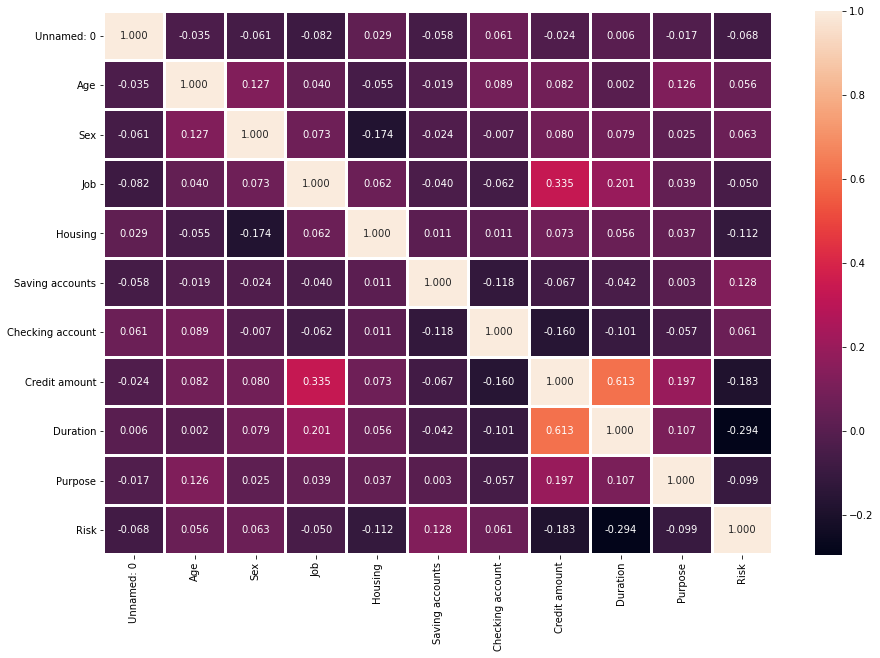

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True, fmt='.3f', linewidths=2)

In [15]:
data.describe()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,493.522989,34.888889,0.678161,1.875479,0.538314,0.342912,0.672414,3278.745211,21.339080,1.831418,0.557471
std,291.131014,11.787918,0.467630,0.682811,0.814614,0.760870,0.651269,2929.155177,12.474079,1.788835,0.497163
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.000000,6.000000,0.000000,0.000000
25%,233.500000,26.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1297.500000,12.000000,0.000000,0.000000
50%,502.500000,31.500000,1.000000,2.000000,0.000000,0.000000,1.000000,2326.500000,18.000000,2.000000,1.000000
75%,736.750000,41.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3971.250000,26.750000,2.000000,1.000000
max,999.000000,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000,1.000000


In [16]:
y = data['Risk']
X = data.drop(columns = ['Risk'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

print(df_train.shape, df_test.shape)

(469, 11) (53, 11)


In [17]:
df_train.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
205,205,38,1,3,1,0,1,10623,30,2,1
251,251,46,0,1,0,0,2,2251,12,1,1
15,15,32,0,1,0,1,1,1282,24,0,0
985,985,25,0,2,2,0,1,1433,15,1,1
284,284,37,1,2,0,1,0,3878,24,2,1


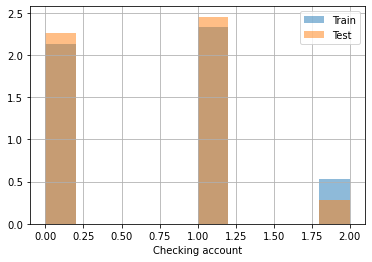

In [18]:
df_train.loc[:, 'Checking account'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Checking account'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Checking account')
plt.legend()

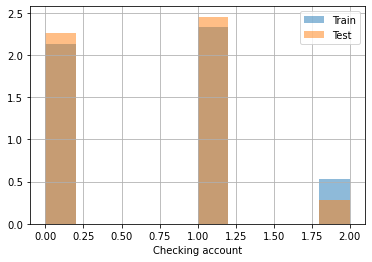

In [19]:
df_train.loc[:, 'Checking account'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Checking account'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Checking account')
plt.legend()

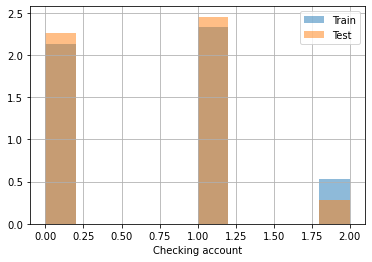

In [20]:
df_train.loc[:, 'Checking account'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Checking account'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Checking account')
plt.legend()

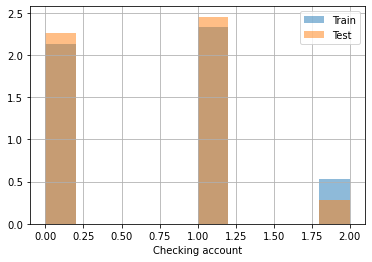

In [21]:
df_train.loc[:, 'Checking account'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Checking account'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Checking account')
plt.legend()

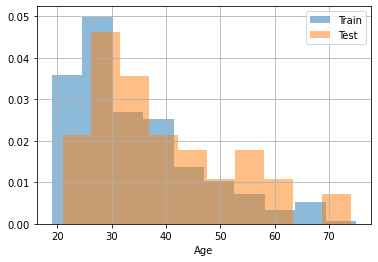

In [22]:
df_train.loc[:, 'Age'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Age'].hist(alpha=0.5, label='Test', density=True)  
plt.xlabel('Age')
plt.legend()

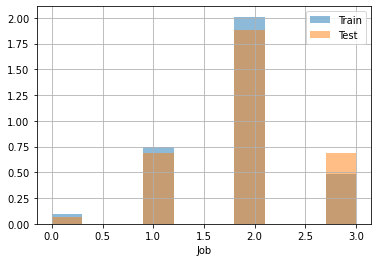

In [23]:
df_train.loc[:, 'Job'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Job'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Job')
plt.legend()

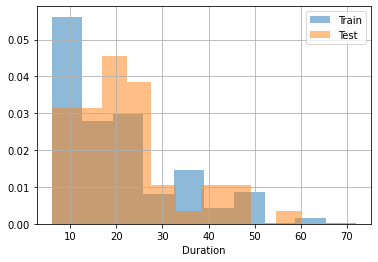

In [24]:
df_train.loc[:, 'Duration'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Duration'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Duration')
plt.legend()

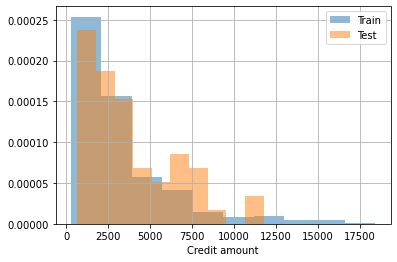

In [25]:
df_train.loc[:, 'Credit amount'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Credit amount'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Credit amount')
plt.legend()

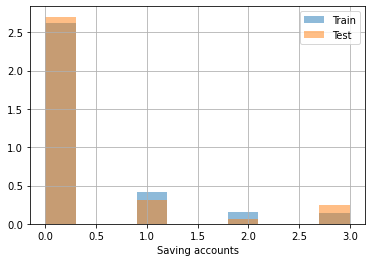

In [26]:
df_train.loc[:, 'Saving accounts'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Saving accounts'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Saving accounts')
plt.legend()